<a href="https://colab.research.google.com/github/Andrewvlad/ML-and-AI/blob/main/Traveling_Salesman%7CGenetic_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TSP w/ GA
*Traveling Salesman Problem using genetic algorithms*<br>
<br>

---


## Introduction:



### Genetic Algorithms:

Genetic algorithms are used to evaluate large search spaces for a good solution. It is
important to note that a genetic algorithm is not guaranteed to find the absolute best
solution; it attempts to find the global best while avoiding local best solutions.

### Process:

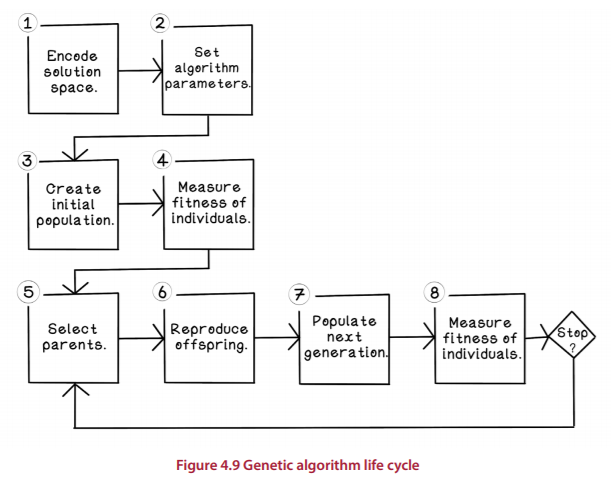

The life cycle of my genetic algorithm - 
1. Encode a solution space 
> Construct a list of 25 (`a_city`) random cities on a 0 - 200 (`a_map`) unit map 
2. Set algorithm paramaters 
> Gather user input for: 
> * Amount of different routes per itteration (`a_size`) 
> * Amount of the best routes to keep per itteration (`a_eliteSize`) 
> * The mutation rate of each itteration (`a_mutationRate`) 
> * The total number of itterations (`a_generations`) 
3. Create initial population 
> Create a new `Generation` class using the algorithm paramaters from above 
4. Measure fitness of individuals 
> Call the `fitness(route)` method to return the total distance of the route (individual) 
5. Select parents 
> Call the `selection(popRanked, size, eliteSize)` method to return a list of routes (parents), which is a selection of the best routes (`eliteSize`) using Elite Selection, as well as using Rank Selection to fill in the rest of the routes (`size`) 
6. Reproduce offspring 
> Call the `breed(matingpool, eliteSize)` method to return the breeded generation 
7. Populate next generation 
> Call the `mutate(children, mutationRate)` method to return the next generation 
*Repeat steps 4-7 until completion*






## Code


---



### Notes:

Note: Results may differ compared to simillar code due to: 
1. Line 15: `hypot` instead of `sqrt` is not only more accurate, but faster. 
> For some reason in Google Colab they both return the same value, but when run locally they do not. 
2. Line 31: no `1/sum()` inversion for an additional decimal point of accuracy. 

Both of these changes will have resulted in more accurate (and therefore longer) distance results. 





### Driver Code: 

In [ ]:
from itertools import repeat
from math import hypot
from operator import itemgetter
from random import seed, sample, random
from numpy import searchsorted
from pandas import DataFrame


class City:
    def __init__(self, x, y):  # initialize the coordinates of a city 
        self.x = x
        self.y = y

    def dist(self, city):  # calculate the distance between two cities 
        return hypot(self.x - city.x, self.y - city.y)


class Generation:
    def __init__(self, cityList, size):  # initialize a list of routes between cities 
        self.currentGen = [sample(cityList, x) for x in repeat(len(cityList), size)]

    def nextGeneration(self, size, eliteSize, mutationRate):  # iterate the next generation 
        pop_ranked = rankRoutes(self.currentGen)
        selection_results = selection(pop_ranked, size, eliteSize)
        pool = matingPool(self.currentGen, selection_results)
        children = breed(pool, eliteSize)
        self.currentGen = mutate(children, mutationRate)


def fitness(route):  # calculate the total distance of a route 
    return sum(a.dist(b) for a, b in zip(route, route[1:])) + route[-1].dist(route[0])


def rankRoutes(population):  # sort the routes based on total distance 
    return sorted([(i, fitness(val)) for i, val in enumerate(population)], key=itemgetter(1))


def selection(popRanked, size, eliteSize):  # use the selection methods defined above to select the pool of routes to move on to the next generation 
    df = DataFrame(popRanked, None, ["Ind", "Fit"])
    df['Weight'] = df.Fit.cumsum() / df.Fit.sum()
    ranked_lst = [item[0] for item in popRanked]
    return [*ranked_lst[:eliteSize], *[ranked_lst[searchsorted(x, random())] for x in repeat(df.Weight, size - eliteSize)]]


def matingPool(population, results):  # get the list of routes based on the indexes from the above method 
    return list(map(population.__getitem__, results))


def breed(matingpool, eliteSize):  # cross-breed the mating pool 
    returnVal = matingpool[:eliteSize]
    append = returnVal.append
    pool = sample(matingpool, len(matingpool))
    for p1, p2 in zip(pool[:len(pool) - eliteSize], pool[::-1]):
        start, end = (getRand(len(p1)), getRand(len(p1)))
        child_p1 = p1[start:end]
        p1_set = set(child_p1)
        append([*child_p1, *[i for i in p2 if i not in p1_set]])
    return returnVal


def mutate(population, mutation_chance):  # mutate the population based on the mutation chance 
    for _pop in population:
        for ind in range(len(_pop)):
            if random() < mutation_chance:
                swap = getRand(len(_pop))
                _pop[swap], _pop[ind] = _pop[ind], _pop[swap]
    return population


def getRand(val):  # get a random value based on an integer 
    return int(random() * val)


def geneticAlgorithm(population, size, eliteSize, mutationRate, generations):  # run a genetic algorithm 
    pop = Generation(population, size)
    print("Initial distance: " + str(rankRoutes(pop.currentGen)[0][1]))
    for x in repeat(pop, generations):
        x.nextGeneration(size, eliteSize, mutationRate)
    print("Final distance: " + str(rankRoutes(pop.currentGen)[0][1]))

### Testing Data:

In [ ]:
a_seed = int(input("Enter the seed (default = 0): ") or 0)

a_map = int(input("Enter the map size (default = 200): ") or 200)
a_city = int(input("Enter the number of cities (default = 25): ") or 25)

a_size = int(input("Enter the size (default = 100): ") or 100)
a_eliteSize = int(input("Enter the eliteSize (default = 20): ") or 20)
a_mutationRate = float(input("Enter the mutationRate (default = 0.01): ") or 0.01)
a_generations = int(input("Enter the generations (default = 50): ") or 50)

seed(a_seed)

cities = [City(int(random() * x), int(random() * x)) for x in repeat(a_map, times=a_city)]
geneticAlgorithm(cities, a_size, a_eliteSize, a_mutationRate, a_generations)

Enter the seed (default = 0): 
Enter the map size (default = 200): 
Enter the number of cities (default = 25): 
Enter the size (default = 100): 
Enter the eliteSize (default = 20): 
Enter the mutationRate (default = 0.01): 
Enter the generations (default = 500): 
Initial distance: 1970.565139033719
Final distance: 981.24894899277


### Speed optimizations (over development):

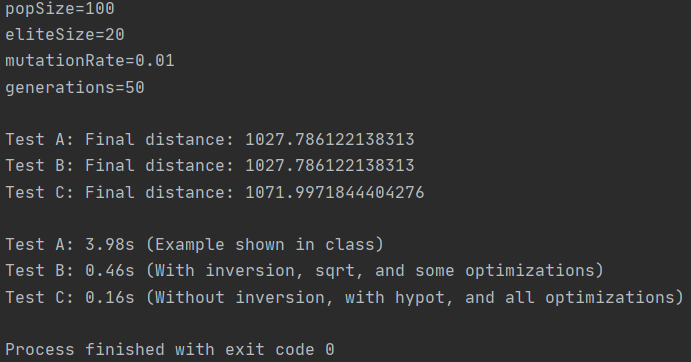

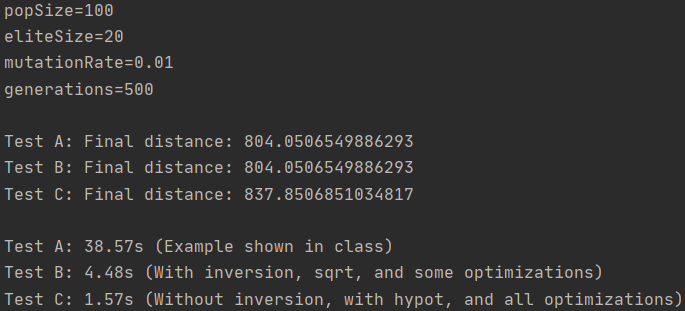